In [1]:
import sys
sys.path.append('../')
import corecomposition as cc

import numpy as np
import pyvo as vo
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table, join

/mnt/d/arsen/research/proj/core-composition/notebooks/../corecomposition/interpolator/utils.py:164: SyntaxWarning: invalid escape sequence '\s'
  base_wavl = np.array(re.split('\s+', ''.join(lines[1:ii])))[1:].astype(float)
/mnt/d/arsen/research/proj/core-composition/notebooks/../corecomposition/interpolator/utils.py:180: SyntaxWarning: invalid escape sequence '\s'
  wavl = np.array(re.split('\s+', ''.join(lines[1:ii])))[1:].astype(float)
/mnt/d/arsen/research/proj/core-composition/notebooks/../corecomposition/interpolator/utils.py:187: SyntaxWarning: invalid escape sequence '\s'
  teff = float(re.split('\s+', lines[prev_ii])[4])
/mnt/d/arsen/research/proj/core-composition/notebooks/../corecomposition/interpolator/utils.py:188: SyntaxWarning: invalid escape sequence '\s'
  logg = np.log10(float(re.split('\s+', lines[prev_ii])[7]))
/mnt/d/arsen/research/proj/core-composition/notebooks/../corecomposition/interpolator/utils.py:192: SyntaxWarning: invalid escape sequence '\s'
  teff = floa

In [2]:
gold = Table.read('../data/processed/gold.csv')
silver = Table.read('../data/processed/silver.csv')
bronze = Table.read('../data/processed/bronze.csv')

In [3]:
photo = cc.photometry.fetch_photometry(bronze['wd_source_id'])
bronze = join(bronze, photo, keys_left='wd_source_id', keys_right='source_id')


In [4]:
photo[photo['source_id'] == 1307515077152381568]

source_id,PS1_g,PS1_r,PS1_i,PS1_z,PS1_y,e_PS1_g,e_PS1_r,e_PS1_i,e_PS1_z,e_PS1_y,source,qualityFlag
,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str3,uint8
1307515077152381568,20.4947,20.3694,20.0103,19.7876,-999.0,0.026247,0.033681,0.044099,0.108458,-999.0,ps1,53


In [5]:
bronze[bronze['wd_source_id'] == 1307515077152381568]

wd_solution_id,ms_solution_id,wd_source_id,ms_source_id,wd_random_index,ms_random_index,wd_ref_epoch,ms_ref_epoch,wd_ra,ms_ra,wd_ra_error,ms_ra_error,wd_dec,ms_dec,wd_dec_error,ms_dec_error,wd_parallax,ms_parallax,wd_parallax_error,ms_parallax_error,wd_parallax_over_error,ms_parallax_over_error,wd_pm,ms_pm,wd_pmra,ms_pmra,wd_pmra_error,ms_pmra_error,wd_pmdec,ms_pmdec,wd_pmdec_error,ms_pmdec_error,wd_ra_dec_corr,ms_ra_dec_corr,wd_ra_parallax_corr,ms_ra_parallax_corr,wd_ra_pmra_corr,ms_ra_pmra_corr,wd_ra_pmdec_corr,ms_ra_pmdec_corr,wd_dec_parallax_corr,ms_dec_parallax_corr,wd_dec_pmra_corr,ms_dec_pmra_corr,wd_dec_pmdec_corr,ms_dec_pmdec_corr,wd_parallax_pmra_corr,ms_parallax_pmra_corr,wd_parallax_pmdec_corr,ms_parallax_pmdec_corr,wd_pmra_pmdec_corr,ms_pmra_pmdec_corr,wd_astrometric_n_obs_al,ms_astrometric_n_obs_al,wd_astrometric_n_obs_ac,ms_astrometric_n_obs_ac,wd_astrometric_n_good_obs_al,ms_astrometric_n_good_obs_al,wd_astrometric_n_bad_obs_al,ms_astrometric_n_bad_obs_al,wd_astrometric_gof_al,ms_astrometric_gof_al,wd_astrometric_chi2_al,ms_astrometric_chi2_al,wd_astrometric_excess_noise,ms_astrometric_excess_noise,wd_astrometric_excess_noise_sig,ms_astrometric_excess_noise_sig,wd_astrometric_params_solved,ms_astrometric_params_solved,wd_astrometric_primary_flag,ms_astrometric_primary_flag,wd_nu_eff_used_in_astrometry,ms_nu_eff_used_in_astrometry,wd_pseudocolour,ms_pseudocolour,wd_pseudocolour_error,ms_pseudocolour_error,wd_ra_pseudocolour_corr,ms_ra_pseudocolour_corr,wd_dec_pseudocolour_corr,ms_dec_pseudocolour_corr,wd_parallax_pseudocolour_corr,ms_parallax_pseudocolour_corr,wd_pmra_pseudocolour_corr,ms_pmra_pseudocolour_corr,wd_pmdec_pseudocolour_corr,ms_pmdec_pseudocolour_corr,wd_astrometric_matched_transits,ms_astrometric_matched_transits,wd_visibility_periods_used,ms_visibility_periods_used,wd_astrometric_sigma5d_max,ms_astrometric_sigma5d_max,wd_matched_transits,ms_matched_transits,wd_new_matched_transits,ms_new_matched_transits,wd_matched_transits_removed,ms_matched_transits_removed,wd_ipd_gof_harmonic_amplitude,ms_ipd_gof_harmonic_amplitude,wd_ipd_gof_harmonic_phase,ms_ipd_gof_harmonic_phase,wd_ipd_frac_multi_peak,ms_ipd_frac_multi_peak,wd_ipd_frac_odd_win,ms_ipd_frac_odd_win,wd_ruwe,ms_ruwe,wd_scan_direction_strength_k1,ms_scan_direction_strength_k1,wd_scan_direction_strength_k2,ms_scan_direction_strength_k2,wd_scan_direction_strength_k3,ms_scan_direction_strength_k3,wd_scan_direction_strength_k4,ms_scan_direction_strength_k4,wd_scan_direction_mean_k1,ms_scan_direction_mean_k1,wd_scan_direction_mean_k2,ms_scan_direction_mean_k2,wd_scan_direction_mean_k3,ms_scan_direction_mean_k3,wd_scan_direction_mean_k4,ms_scan_direction_mean_k4,wd_duplicated_source,ms_duplicated_source,wd_phot_g_n_obs,ms_phot_g_n_obs,wd_phot_g_mean_flux,ms_phot_g_mean_flux,wd_phot_g_mean_flux_error,ms_phot_g_mean_flux_error,wd_phot_g_mean_flux_over_error,ms_phot_g_mean_flux_over_error,wd_phot_g_mean_mag,ms_phot_g_mean_mag,wd_phot_bp_n_obs,ms_phot_bp_n_obs,wd_phot_bp_mean_flux,ms_phot_bp_mean_flux,wd_phot_bp_mean_flux_error,ms_phot_bp_mean_flux_error,wd_phot_bp_mean_flux_over_error,ms_phot_bp_mean_flux_over_error,wd_phot_bp_mean_mag,ms_phot_bp_mean_mag,wd_phot_rp_n_obs,ms_phot_rp_n_obs,wd_phot_rp_mean_flux,ms_phot_rp_mean_flux,wd_phot_rp_mean_flux_error,ms_phot_rp_mean_flux_error,wd_phot_rp_mean_flux_over_error,ms_phot_rp_mean_flux_over_error,wd_phot_rp_mean_mag,ms_phot_rp_mean_mag,wd_phot_bp_n_contaminated_transits,ms_phot_bp_n_contaminated_transits,wd_phot_bp_n_blended_transits,ms_phot_bp_n_blended_transits,wd_phot_rp_n_contaminated_transits,ms_phot_rp_n_contaminated_transits,wd_phot_rp_n_blended_transits,ms_phot_rp_n_blended_transits,wd_phot_proc_mode,ms_phot_proc_mode,wd_phot_bp_rp_excess_factor,ms_phot_bp_rp_excess_factor,wd_bp_rp,ms_bp_rp,wd_bp_g,ms_bp_g,wd_g_rp,ms_g_rp,wd_dr2_radial_velocity,ms_dr2_radial_velocity,wd_dr2_radial_velocity_error,ms_dr2_radial_velocity_error,wd_dr2_rv_nb_transits,ms_dr2_rv_nb_transits,wd_dr2_rv_template_teff,ms_dr2

In [6]:
source_ids = bronze['wd_source_id']
coords = [SkyCoord(frame="galactic", l=bronze['wd_l'][i]*u.deg, b=bronze['wd_b'][i]*u.deg, distance = bronze['distance'][i] * u.pc) for i in range(len(bronze))]
astrometric_params = bronze['wd_astrometric_params_solved']
photo = np.array([bronze['wd_phot_g_mean_mag'], bronze['wd_phot_bp_mean_mag'], bronze['wd_phot_rp_mean_mag']]).T
e_photo = np.array([bronze['wd_e_gmag'], bronze['wd_e_bpmag'], bronze['wd_e_rpmag']]).T
initial_params = np.array([bronze['CO_Hdef_teff'], bronze['CO_Hdef_radius']]).T

In [7]:
coords[0].distance.value

191.31002807617188

In [8]:
photo[0]

array([20.463974  , 20.26536369, 20.02454376])

In [9]:
i = 0
obj = cc.photometry.Photometry(source_ids, coords, astrometric_params, photo, e_photo, initial_params)

In [10]:
# 20.463974  
obj.photo[1307515077152381568]

[<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
     (47.59647076, 38.41553515, 191.31002808)>,
 31,
 array(['Gaia_G', 'Gaia_BP', 'Gaia_RP', 'PS1_g', 'PS1_r', 'PS1_i', 'PS1_z'],
       dtype='<U7'),
 array([20.463974  , 20.26536369, 20.02454376, 20.49469948, 20.36940002,
        20.01029968, 19.78759956]),
 array([0.00466615, 0.14141639, 0.09539126, 0.026247  , 0.033681  ,
        0.044099  , 0.108458  ]),
 array([8.89800454e+03, 7.23204103e-03])]

In [11]:
from dustmaps.edenhofer2023 import Edenhofer2023Query
bsq = Edenhofer2023Query()

Optimizing map for querying (this might take a couple of seconds)...


In [ ]:
obj.deredden(bsq)

In [ ]:
obj.photo[1307515077152381568]

In [45]:
chains = obj.run_mcmc(cc.interpolator.LaPlataUltramassive, core='CO', layer='Hdef')

with open('../data/cleaned/radius_chains_CO_Hdef.pkl', 'wb') as f:
    pickle.dump(chains, f)

  0%|          | 0/26 [00:00<?, ?it/s]

N/50 = 50;
tau: [86.77038936 86.16781841]


Auto-Correlation Time = 86.77038936213965, additional steps = 2012


  4%|▍         | 1/26 [02:52<1:11:43, 172.16s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [114.02194543 125.57573117]


Auto-Correlation Time = 125.5757311685652, additional steps = 4029


  8%|▊         | 2/26 [07:02<1:27:10, 217.94s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [74.0993826  73.46319115]


Auto-Correlation Time = 74.09938259790329, additional steps = 1353


 12%|█▏        | 3/26 [09:03<1:06:41, 173.97s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [92.75721895 99.54164272]


Auto-Correlation Time = 99.5416427177205, additional steps = 2676


 15%|█▌        | 4/26 [11:55<1:03:26, 173.01s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [93.74077505 98.54876199]


Auto-Correlation Time = 98.54876198801611, additional steps = 2624


 19%|█▉        | 5/26 [15:31<1:06:01, 188.63s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [333.96357071 333.4145548 ]


Auto-Correlation Time = 333.9635707140407, additional steps = 14866


 27%|██▋       | 7/26 [24:26<1:07:19, 212.62s/it]

Auto-Correlation Time = 47.45304155000962, additional steps = -33


N/50 = 50;
tau: [61.56841885 59.95249334]


Auto-Correlation Time = 61.56841885439044, additional steps = 701


 35%|███▍      | 9/26 [27:42<42:01, 148.31s/it]  

Auto-Correlation Time = 35.446128316969514, additional steps = -657


N/50 = 50;
tau: [107.1302343  114.78191896]


Auto-Correlation Time = 114.78191895983898, additional steps = 3468


 38%|███▊      | 10/26 [31:36<46:35, 174.73s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [83.54659255 82.4297656 ]


Auto-Correlation Time = 83.54659255014575, additional steps = 1844


 42%|████▏     | 11/26 [33:49<40:26, 161.80s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [162.80464205 188.49418227]


Auto-Correlation Time = 188.49418226592607, additional steps = 7301


 46%|████▌     | 12/26 [37:44<42:57, 184.14s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [115.41973469 122.16947714]


Auto-Correlation Time = 122.16947714086103, additional steps = 3852


 50%|█████     | 13/26 [41:54<44:14, 204.20s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [126.2033501  126.78094828]


Auto-Correlation Time = 126.78094828315653, additional steps = 4092


 54%|█████▍    | 14/26 [45:43<42:18, 211.53s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [115.49824236 126.98406537]


Auto-Correlation Time = 126.98406537235415, additional steps = 4103


 58%|█████▊    | 15/26 [49:30<39:38, 216.23s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [103.655101   126.91338927]


Auto-Correlation Time = 126.91338927269429, additional steps = 4099


 62%|██████▏   | 16/26 [52:02<32:49, 196.98s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [79.55294664 96.95520497]


Auto-Correlation Time = 96.9552049726211, additional steps = 2541


 65%|██████▌   | 17/26 [56:00<31:24, 209.38s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [174.16481676 174.21593294]


Auto-Correlation Time = 174.2159329369857, additional steps = 6559


 69%|██████▉   | 18/26 [1:01:41<33:10, 248.81s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [58.42069399 58.36630348]


Auto-Correlation Time = 58.42069398547406, additional steps = 537


 77%|███████▋  | 20/26 [1:04:15<16:00, 160.03s/it]

Auto-Correlation Time = 30.98134757185646, additional steps = -889


 81%|████████  | 21/26 [1:05:27<11:07, 133.57s/it]

Auto-Correlation Time = 43.81933075933401, additional steps = -222


N/50 = 50;
tau: [254.18453337 255.4077091 ]


Auto-Correlation Time = 255.40770910179594, additional steps = 10781


 85%|████████▍ | 22/26 [1:10:19<12:05, 181.29s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [ 95.7938769  104.75473917]


Auto-Correlation Time = 104.7547391718033, additional steps = 2947


 88%|████████▊ | 23/26 [1:14:31<10:07, 202.48s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [75.31971484 76.73854585]


Auto-Correlation Time = 76.73854585399098, additional steps = 1490


 92%|█████████▏| 24/26 [1:16:30<05:55, 177.50s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [77.75309875 87.03429612]


Auto-Correlation Time = 87.03429611808716, additional steps = 2025


 96%|█████████▌| 25/26 [1:18:56<02:47, 168.00s/it]WARNING:emcee.autocorr:The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [307.63616794 330.06142422]


Auto-Correlation Time = 330.0614242207755, additional steps = 14663


100%|██████████| 26/26 [1:24:17<00:00, 194.52s/it]


In [46]:
chains = obj.run_mcmc(cc.interpolator.LaPlataUltramassive, core='CO', layer='Hrich')

with open('../data/cleaned/radius_chains_CO_Hrich.pkl', 'wb') as f:
    pickle.dump(chains, f)

In [47]:
chains = obj.run_mcmc(cc.interpolator.LaPlataUltramassive, core='ONe', layer='Hrich')

with open('../data/cleaned/radius_chains_ONe_Hrich.pkl', 'wb') as f:
    pickle.dump(chains, f)

(4900, 2)

In [ ]:
chains = obj.run_mcmc(cc.interpolator.LaPlataUltramassive, core='ONe', layer='Hdef')

with open('../data/cleaned/radius_chains_ONe_Hdef.pkl', 'wb') as f:
    pickle.dump(chains, f)

['Gaia_G' 'Gaia_BP' 'Gaia_RP' 'PS1_g' 'PS1_r' 'PS1_i' 'PS1_z' 'PS1_y']


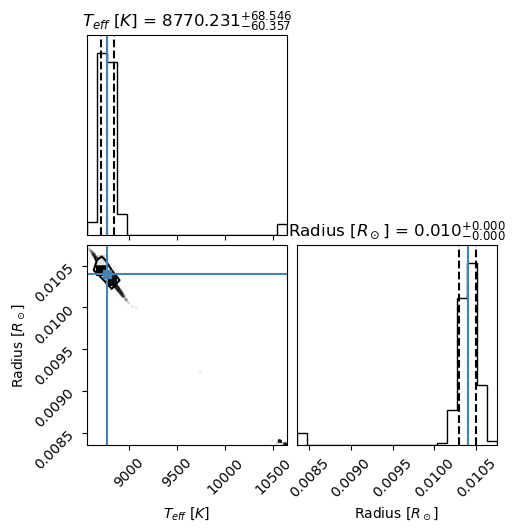

In [48]:
import corner

id = list(chains.keys())[10]

labels = [r'$T_{eff}$ $[K]$', r'Radius $[R_\odot]$']
best_est = np.zeros((len(labels)))
unc = []

for i in range(len(labels)):
    mcmc = np.percentile(chains[id][:, i],[16,50,84])
    best_est[i] = mcmc[1]
    unc.append(np.diff(mcmc))
unc = np.array(unc)

print(obj.photo[id][2])

emcee_plot = corner.corner(chains[id], labels=labels, truths = best_est, quantiles = [0.16, 0.5, 0.84], show_titles = True, 
                           title_fmt = '.3f', title_kwargs={"fontsize": 12})

plt.show()

In [49]:
gold_coverage = join(gold, table, keys_left='wd_source_id', keys_right='source_id')
silver_coverage = join(silver, table, keys_left='wd_source_id', keys_right='source_id')
bronze_coverage = table

print(f'gold coverage = {len(gold_coverage)} / {len(gold)}')
print(f'silver coverage = {len(silver_coverage)} / {len(silver)}')
print(f'bronze coverage = {len(bronze_coverage)} / {len(bronze)}')

NameError: name 'table' is not defined

In [ ]:
gold_coverage

wd_solution_id,ms_solution_id,wd_source_id,ms_source_id,wd_random_index,ms_random_index,wd_ref_epoch,ms_ref_epoch,wd_ra,ms_ra,wd_ra_error,ms_ra_error,wd_dec,ms_dec,wd_dec_error,ms_dec_error,wd_parallax,ms_parallax,wd_parallax_error,ms_parallax_error,wd_parallax_over_error,ms_parallax_over_error,wd_pm,ms_pm,wd_pmra,ms_pmra,wd_pmra_error,ms_pmra_error,wd_pmdec,ms_pmdec,wd_pmdec_error,ms_pmdec_error,wd_ra_dec_corr,ms_ra_dec_corr,wd_ra_parallax_corr,ms_ra_parallax_corr,wd_ra_pmra_corr,ms_ra_pmra_corr,wd_ra_pmdec_corr,ms_ra_pmdec_corr,wd_dec_parallax_corr,ms_dec_parallax_corr,wd_dec_pmra_corr,ms_dec_pmra_corr,wd_dec_pmdec_corr,ms_dec_pmdec_corr,wd_parallax_pmra_corr,ms_parallax_pmra_corr,wd_parallax_pmdec_corr,ms_parallax_pmdec_corr,wd_pmra_pmdec_corr,ms_pmra_pmdec_corr,wd_astrometric_n_obs_al,ms_astrometric_n_obs_al,wd_astrometric_n_obs_ac,ms_astrometric_n_obs_ac,wd_astrometric_n_good_obs_al,ms_astrometric_n_good_obs_al,wd_astrometric_n_bad_obs_al,ms_astrometric_n_bad_obs_al,wd_astrometric_gof_al,ms_astrometric_gof_al,wd_astrometric_chi2_al,ms_astrometric_chi2_al,wd_astrometric_excess_noise,ms_astrometric_excess_noise,wd_astrometric_excess_noise_sig,ms_astrometric_excess_noise_sig,wd_astrometric_params_solved,ms_astrometric_params_solved,wd_astrometric_primary_flag,ms_astrometric_primary_flag,wd_nu_eff_used_in_astrometry,ms_nu_eff_used_in_astrometry,wd_pseudocolour,ms_pseudocolour,wd_pseudocolour_error,ms_pseudocolour_error,wd_ra_pseudocolour_corr,ms_ra_pseudocolour_corr,wd_dec_pseudocolour_corr,ms_dec_pseudocolour_corr,wd_parallax_pseudocolour_corr,ms_parallax_pseudocolour_corr,wd_pmra_pseudocolour_corr,ms_pmra_pseudocolour_corr,wd_pmdec_pseudocolour_corr,ms_pmdec_pseudocolour_corr,wd_astrometric_matched_transits,ms_astrometric_matched_transits,wd_visibility_periods_used,ms_visibility_periods_used,wd_astrometric_sigma5d_max,ms_astrometric_sigma5d_max,wd_matched_transits,ms_matched_transits,wd_new_matched_transits,ms_new_matched_transits,wd_matched_transits_removed,ms_matched_transits_removed,wd_ipd_gof_harmonic_amplitude,ms_ipd_gof_harmonic_amplitude,wd_ipd_gof_harmonic_phase,ms_ipd_gof_harmonic_phase,wd_ipd_frac_multi_peak,ms_ipd_frac_multi_peak,wd_ipd_frac_odd_win,ms_ipd_frac_odd_win,wd_ruwe,ms_ruwe,wd_scan_direction_strength_k1,ms_scan_direction_strength_k1,wd_scan_direction_strength_k2,ms_scan_direction_strength_k2,wd_scan_direction_strength_k3,ms_scan_direction_strength_k3,wd_scan_direction_strength_k4,ms_scan_direction_strength_k4,wd_scan_direction_mean_k1,ms_scan_direction_mean_k1,wd_scan_direction_mean_k2,ms_scan_direction_mean_k2,wd_scan_direction_mean_k3,ms_scan_direction_mean_k3,wd_scan_direction_mean_k4,ms_scan_direction_mean_k4,wd_duplicated_source,ms_duplicated_source,wd_phot_g_n_obs,ms_phot_g_n_obs,wd_phot_g_mean_flux,ms_phot_g_mean_flux,wd_phot_g_mean_flux_error,ms_phot_g_mean_flux_error,wd_phot_g_mean_flux_over_error,ms_phot_g_mean_flux_over_error,wd_phot_g_mean_mag,ms_phot_g_mean_mag,wd_phot_bp_n_obs,ms_phot_bp_n_obs,wd_phot_bp_mean_flux,ms_phot_bp_mean_flux,wd_phot_bp_mean_flux_error,ms_phot_bp_mean_flux_error,wd_phot_bp_mean_flux_over_error,ms_phot_bp_mean_flux_over_error,wd_phot_bp_mean_mag,ms_phot_bp_mean_mag,wd_phot_rp_n_obs,ms_phot_rp_n_obs,wd_phot_rp_mean_flux,ms_phot_rp_mean_flux,wd_phot_rp_mean_flux_error,ms_phot_rp_mean_flux_error,wd_phot_rp_mean_flux_over_error,ms_phot_rp_mean_flux_over_error,wd_phot_rp_mean_mag,ms_phot_rp_mean_mag,wd_phot_bp_n_contaminated_transits,ms_phot_bp_n_contaminated_transits,wd_phot_bp_n_blended_transits,ms_phot_bp_n_blended_transits,wd_phot_rp_n_contaminated_transits,ms_phot_rp_n_contaminated_transits,wd_phot_rp_n_blended_transits,ms_phot_rp_n_blended_transits,wd_phot_proc_mode,ms_phot_proc_mode,wd_phot_bp_rp_excess_factor,ms_phot_bp_rp_excess_factor,wd_bp_rp,ms_bp_rp,wd_bp_g,ms_bp_g,wd_g_rp,ms_g_rp,wd_dr2_radial_velocity,ms_dr2_radial_velocity,wd_dr2_radial_velocity_error,ms_dr2_radial_velocity_error,wd_dr2_rv_nb_transits,ms_dr2_rv_nb_transits,wd_dr2_rv_template_teff,ms_dr2